In [1]:
#Importé los paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq, rfft
import numpy as np

In [2]:
#Leí el archivo de texto, especificando que está separado por espacios y el nombre de cada columna
df = pd.read_table("SN_m_tot_V2.0.txt",delim_whitespace=True,names=("Año","Mes","Añodec","Manchas","A","B"),header=None)

In [3]:
#Una muestra del resultado de la lectura
df.head()

,Año,Mes,Añodec,Manchas,A,B
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1


In [4]:
#Inserté los datos y apliqué la transformación
N = 3213
T = 1.0
y = df[u'Manchas']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
ys = fftshift(yf)

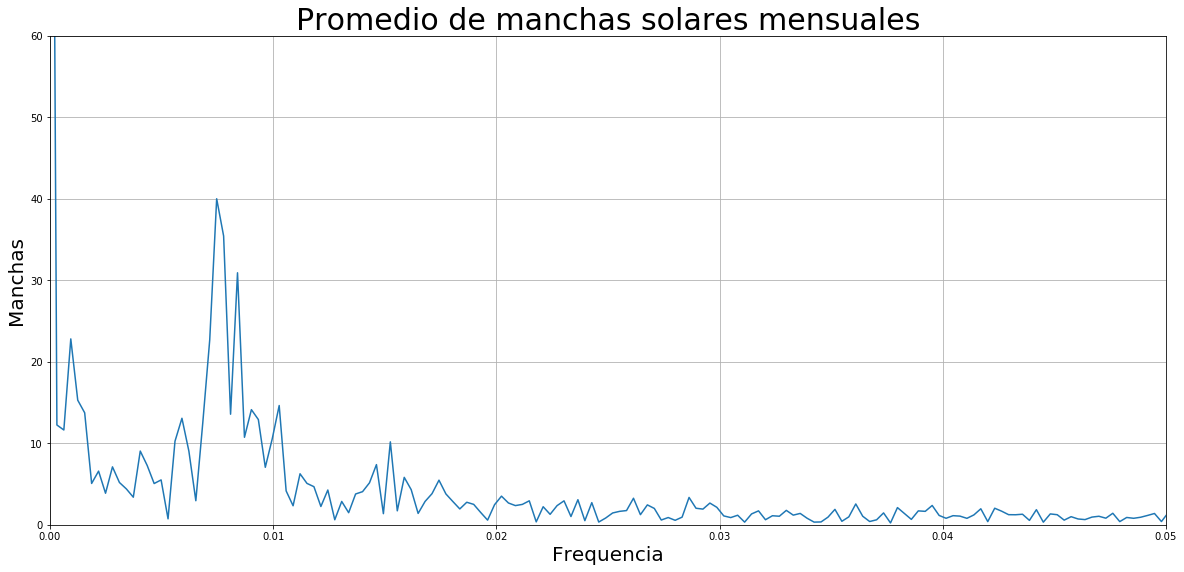

In [5]:
#Configuré las opciones para presentar la gráfica, ahora con un rango adecuado
plt.figure(figsize=(20, 9))
plt.ylabel('Manchas',size=20)
plt.xlabel('Frequencia',size=20)
plt.title('Promedio de manchas solares mensuales',size=30)
plt.xlim([0,0.05])
plt.ylim([0,60])
plt.plot(xf, 2.0/N * abs(ys))
plt.grid(True)
plt.show()

In [6]:
#Busqué los valores reales, filtré los mayores a 25 y los mostré
b = abs(yf/1606.5)
b[b[:,] > 25]
print(np.where(b[:,]>25))
c= b[b[:,]>25]

(array([   0,   24,   25,   27, 3186, 3188, 3189], dtype=int64),)


In [7]:
#Utilizando algunos de estos valores más la suma de N/2, nos daran periodos buscados de cada vez que hay un pico.
F1=xf[int(1606.5 + 24)]
F2=xf[int(1606.5+25)]
F3=xf[int(1606.5+27)]

print('Periodo:',1/(F1*12), 'Años')
print('Otros periodos:','|',1/(F2*12),'años|',1/(F3*12),'años')

Periodo: 11.15625 Años
Otros periodos: | 10.71 años| 9.91666666667 años


In [8]:
#Promedié las frequencias y despúes tomé su inversa para encontrar el promedio de periodos
Promedio_frecuencias=(F1*12+F2*12+F3*12)/3.0
Promedio_periodo=1/Promedio_frecuencias
Promedio_periodo

10.569078947368421

In [16]:
#Por último, usando estos máximos, mostré la Amplitud, Frequencia y periodo dentro de estos.
print()
print('Primer armónico')
print('Número de Manchas=',abs(yf[24,]/3213))
print('Frecuencia=', xf[int(1606.5 +24),])
print('Periodo=', 1/xf[int(1606.5 +24),])

print()
print('Segundo armónico')
print('Número de Manchas=',abs(yf[25,]/3213))
print('Frecuencia=', xf[int(1606.5 +25),])
print('Periodo=', 1/xf[int(1606.5 +25),])

print()
print('Tercer armónico')
print('Número de Manchas=',abs(yf[27,]/3213))
print('Frecuencia=', xf[int(1606.5 +27),])
print('Periodo=', 1/xf[int(1606.5 +27),])
#Los periodos divididos entre 12 nos darán los años que son entre cada ciclo solar.


Primer armónico
Número de Manchas= 19.9936166043
Frecuencia= 0.00746965452848
Periodo= 133.875

Segundo armónico
Número de Manchas= 17.7099160016
Frecuencia= 0.00778089013383
Periodo= 128.52

Tercer armónico
Número de Manchas= 15.4540189405
Frecuencia= 0.00840336134454
Periodo= 119.0
